In [1]:
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt

from mlgrad.cluster import KMeans, KMeansMahalanobis, RKMeans
import mlgrad.af as af
import mlgrad.cluster as cluster
import mlgrad.funcs as funcs


In [2]:
sdata = pd.read_csv("../data/cbb/s3.txt", names=['x1', 'x2'], sep='\s+')

In [3]:
X = np.c_[sdata['x1'], sdata['x2']]
X = np.ascontiguousarray(X, 'd')
X /= 1000000.
print(len(X))
print(X)

5000
[[0.453 0.607]
 [0.521 0.595]
 [0.517 0.660]
 ...
 [0.351 0.335]
 [0.341 0.341]
 [0.374 0.284]]


In [4]:
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
x_min = min(x1_min, x2_min)
x_max = max(x1_max, x2_max)
extent = (x_min, x_max, x_min, x_max)
xrange1 = np.linspace(x_min, x_max, 100)
xrange2 = np.linspace(x_min, x_max, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]

In [5]:
def get_range(a, q=20):
    amin, amax = min(a), max(a)
    h = (amax - amin) / q
    return amin - h, amax + h

xmin, xmax = get_range(X[:,0])
ymin, ymax = get_range(X[:,1])
XX, YY = np.meshgrid(
            np.linspace(xmin, xmax, 100), 
            np.linspace(ymin, ymax, 100))
XY = np.c_[(XX.ravel(), YY.ravel())]

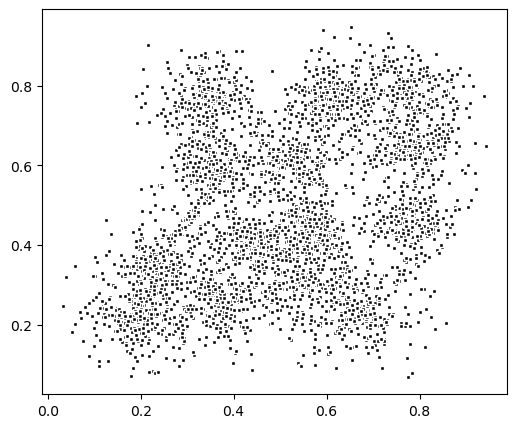

In [6]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.show()

In [7]:
kmm = KMeansMahalanobis(15)

In [8]:
kmm.fit(X)

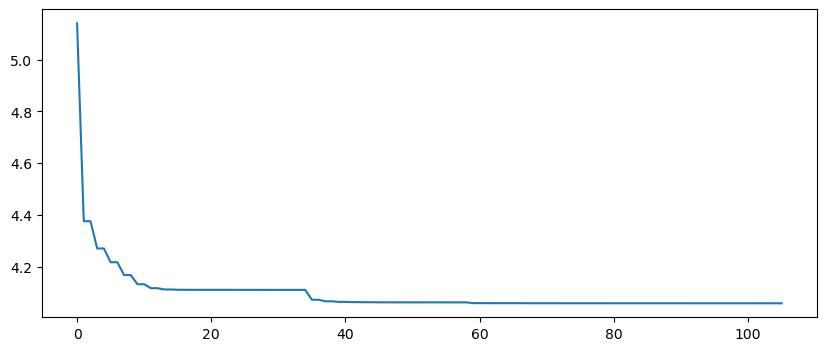

In [9]:
plt.figure(figsize=(10,4))
plt.plot(kmm.qvals)
plt.show()

In [10]:
Y_p = kmm.predict(X)
# print(kmm.c)

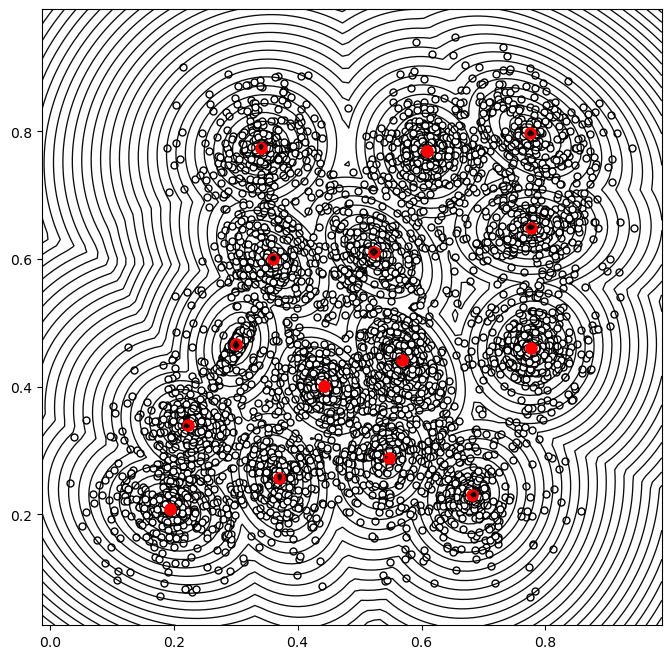

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', s=25)
plt.scatter(kmm.c[:,0], kmm.c[:,1], c='r', s=64)

Z = np.sqrt(kmm.eval_dists(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), 
            extent=(xmin,xmax,ymin,ymax), linewidths=0.95, alpha=0.95, colors='k')

zz = np.quantile(np.fromiter(kmm.eval_dists(X), 'd', len(X)), 0.75)
plt.contour(ZZ, levels=[zz], extent=(xmin,xmax,ymin,ymax), linewidths=2, colors='k', alpha=0.95)

plt.show()

In [12]:
wma = af.averaging_function("WM", funcs.Quantile_Sqrt(0.95, 0.001))
rkm = cluster.RKMeans(15, wma)
rkm.fit(X)

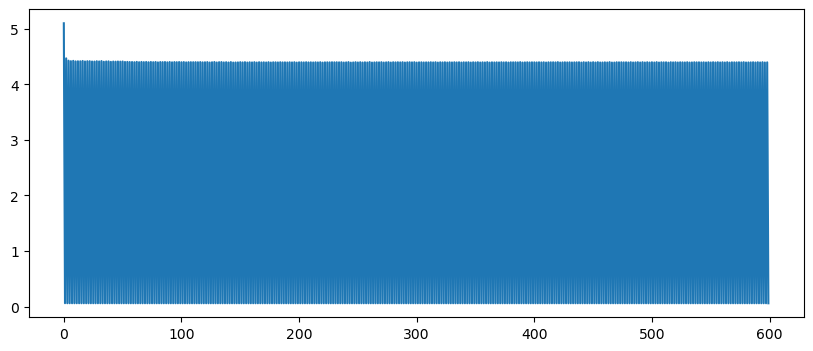

In [13]:
plt.figure(figsize=(10,4))
plt.plot(rkm.qvals)
plt.show()

In [14]:
Y2p = rkm.predict(X)

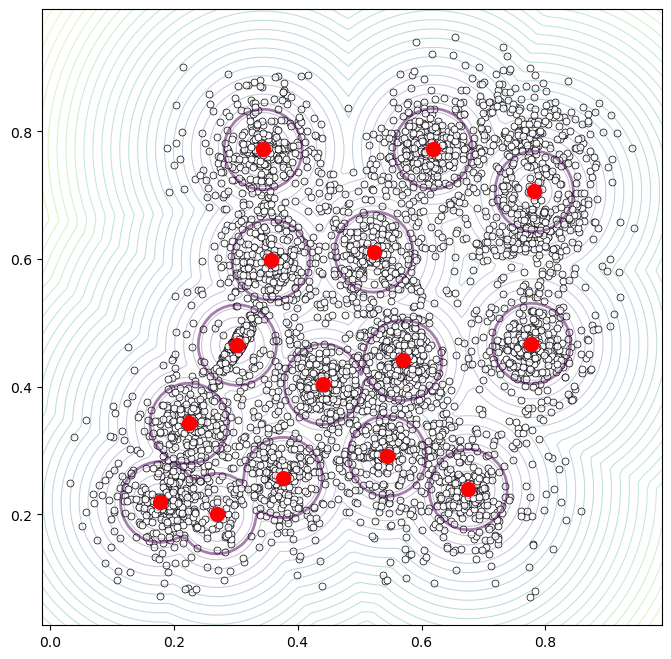

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.scatter(rkm.c[:,0], rkm.c[:,1], c='r', s=100)

Z = np.sqrt(rkm.eval_dists(XY))

ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(xmin,xmax,ymin,ymax), linewidths=0.75, alpha=0.3)

zz = np.quantile(np.sqrt(rkm.eval_dists(X)), 0.66)
plt.contour(ZZ, levels=[zz], extent=(xmin,xmax,ymin,ymax), linewidths=2, alpha=0.5)


plt.show()

In [ ]:
wma = af.averaging_function("WM", funcs.Quantile_Sqrt(0.96, 0.001))
rkmm = cluster.RKMeansMahalanobis(15, wma)
rkmm.fit(X)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(rkmm.qvals)
plt.show()

In [ ]:
Y2p = rkmm.predict(X)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.scatter(rkmm.c[:,0], rkmm.c[:,1], c='r', s=100)

Z = np.sqrt(rkmm.eval_dists(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(xmin,xmax,ymin,ymax), linewidths=0.75, colors='k', alpha=0.5)

zz = np.quantile(np.sqrt(rkmm.eval_dists(X)), 0.75)
plt.contour(ZZ, levels=[zz], extent=(xmin,xmax,ymin,ymax), linewidths=2, colors='k', alpha=0.75)


plt.show()